# Часть 1: Обзор метода градиентного бустинга

Градиентный бустинг - это техника машинного обучения для задач регрессии и классификации, которая строит модель, используя ансамбль слабых моделей, обычно деревьев решений. Градиентный бустинг обучает деревья последовательно, каждое из которых пытается исправить ошибки предыдущего дерева.

### Основные идеи градиентного бустинга: 
1. Ансамбль слабых моделей: градиентный бустинг комбинирует несколько простых моделей (деревьев решений) для создания более мощной модели.
2. Последовательное обучение: вместо обучения моделей параллельно, градиентный бустинг обучает модели последовательно, позволяя каждой последующей модели улучшать предыдущую.
3. Градиентный спуск: градиентный бустинг использует градиентный спуск для оптимизации потерь.

### Преимущества градиентного бустинга:
1. Высокая производительность: градиентный бустинг является одним из самых мощных алгоритмов машинного обучения и может достигать очень высокой точности.
2. Гибкость: градиентный бустинг может быть адаптирован для различных функций потерь и различных типов данных.
3. Робустность: градиентный бустинг устойчив к выбросам и несбалансированным данным.


# Загрузка данных

In [ ]:
# Пдгружаем более старую версию sklearn, так как в новой boston_dataset уже нельзя скачать
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Градиентный бустинг в scikit-learn

In [ ]:
# Импортируем необходимые библиотеки
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загружаем данные
boston = load_boston()

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Создаем объект градиентного бустинга
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Обучаем модель на обучающей выборке
gb.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = gb.predict(X_test)

# Оцениваем качество модели на тестовой выборке с помощью MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 14.52681979717445


# Часть 2: Обзор библиотек CatBoost vs. Light GBM vs. XGBoost. В чем разница и как ими пользоваться.

LightGBM MSE: 0.05120338345937751
XGBoost MSE: 0.048173500922962305


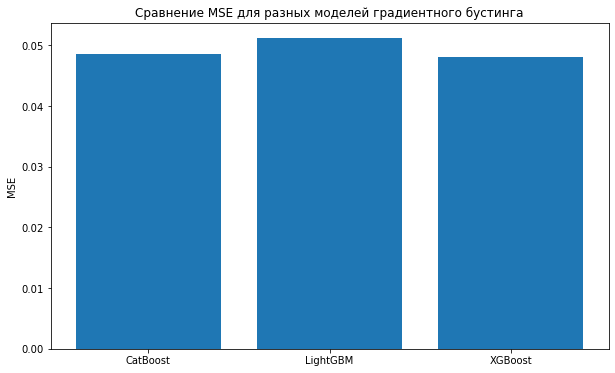

In [ ]:
# Установка библиотек
# !pip install catboost lightgbm xgboost

# Импорт библиотек
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# CatBoost:
# - Разработан командой Яндекса
# - Особенно подходит для обработки категориальных признаков без предварительной обработки
# - Отличается устойчивостью к переобучению
# - Предоставляет инструменты для визуализации обучения и предсказаний
# - Время обучения может быть дольше, чем у других алгоритмов, но предлагает высокую точность
cat_model = CatBoostRegressor(verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)
cat_y_pred = cat_model.predict(X_test)
cat_mse = mean_squared_error(y_test, cat_y_pred)

# LightGBM:
# - Разработан Microsoft
# - Использует технику GOSS (Gradient-based One-Side Sampling) и EFB (Exclusive Feature Bundling) для ускорения обучения и снижения потребления памяти
# - Отлично подходит для работы с большими наборами данных и может обрабатывать наборы данных с более чем 1 миллионом записей
# - Легковесный, быстрый и эффективный по памяти
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_y_pred)

# XGBoost:
# - Изначально разработан в рамках проекта DMLC (Distributed Machine Learning Community)
# - Подходит для задач классификации и регрессии
# - Очень популярен из-за своей эффективности и точности
# - Предоставляет встроенные методы регуляризации, уменьшая вероятность переобучения
# - Отличается высокой производительностью и параллельным обучением
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

print(f'LightGBM MSE: {lgbm_mse}')
print(f'XGBoost MSE: {xgb_mse}')

# Визуализация ошибок
plt.figure(figsize=(10, 6))
plt.bar(['CatBoost', 'LightGBM', 'XGBoost'], [cat_mse, lgbm_mse, xgb_mse])
plt.title('Сравнение MSE для разных моделей градиентного бустинга')
plt.ylabel('MSE')
plt.show()


# Часть 3: Как выбрать правильный инструмент.

В зависимости от особенностей данных и задачи, разные алгоритмы градиентного бустинга могут быть наиболее подходящими.
Давайте рассмотрим некоторые основные сценарии:

1. Если ваши данные содержат большое количество категориальных признаков, то CatBoost может быть лучшим выбором,
   поскольку он разработан специально для обработки категориальных признаков без предварительной обработки.

2. Если у вас большой объем данных или ограничения по памяти, LightGBM может быть лучшим выбором,
   благодаря своим техникам ускорения обучения и снижения потребления памяти.

3. Если вы ищете хорошее сочетание производительности и точности, XGBoost может быть подходящим выбором.
   XGBoost доказал свою эффективность и популярность среди специалистов по данным и ученых благодаря
   своим встроенным методам регуляризации и параллельному обучению.

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, CatBoostClassifier

# Пример 1: CatBoost, LightGBM, XGBoost для категориальных признаков (CatBoost)
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model = CatBoostRegressor(verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)
cat_y_pred = cat_model.predict(X_test)
cat_r2 = r2_score(y_test, cat_y_pred)

lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_r2 = r2_score(y_test, lgbm_y_pred)

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'CatBoost R2 score (categorical features): {cat_r2}')
print(f'LightGBM R2 score (categorical features): {lgbm_r2}')
print(f'XGBoost R2 score (categorical features): {xgb_r2}')

CatBoost R2 score (categorical features): 0.9882013817062888
LightGBM R2 score (categorical features): 0.9642119639613254
XGBoost R2 score (categorical features): 0.9311254883217411


In [ ]:
# Пример 2: CatBoost, LightGBM, XGBoost для больших данных (LightGBM)
X_big, y_big = make_classification(n_samples=100000, n_features=50, n_informative=10, n_classes=2, random_state=42)
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X_big, y_big, test_size=0.2, random_state=42)

cat_model_big = CatBoostClassifier(verbose=0, random_seed=42, learning_rate=0.1, depth=4)
cat_model_big.fit(X_train_big, y_train_big)
cat_y_pred_big = cat_model_big.predict(X_test_big)
cat_accuracy_big = accuracy_score(y_test_big, cat_y_pred_big)

lgbm_model_big = LGBMClassifier(random_state=42, n_jobs=-1, num_leaves=60, n_estimators=200, max_depth=9)
lgbm_model_big.fit(X_train_big, y_train_big)
lgbm_y_pred_big = lgbm_model_big.predict(X_test_big)
lgbm_accuracy_big = accuracy_score(y_test_big, lgbm_y_pred_big)

xgb_model_big = XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, max_depth=4)
xgb_model_big.fit(X_train_big, y_train_big)
xgb_y_pred_big = xgb_model_big.predict(X_test_big)
xgb_accuracy_big = accuracy_score(y_test_big, xgb_y_pred_big)

print(f'CatBoost accuracy (big data): {cat_accuracy_big}')
print(f'LightGBM accuracy (big data): {lgbm_accuracy_big}')
print(f'XGBoost accuracy (big data): {xgb_accuracy_big}')

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CatBoost accuracy (big data): 0.98115
LightGBM accuracy (big data): 0.982
XGBoost accuracy (big data): 0.96615


In [ ]:
# Пример 3: CatBoost, LightGBM, XGBoost с оптимальными параметрами для регуляризации (XGBoost)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model_reg = CatBoostClassifier(verbose=0, random_seed=42, l2_leaf_reg=20)
cat_model_reg.fit(X_train, y_train)
cat_y_pred_reg = cat_model_reg.predict(X_test)
cat_accuracy_reg = accuracy_score(y_test, cat_y_pred_reg)

lgbm_model_reg = LGBMClassifier(random_state=42, n_jobs=-1, reg_alpha=5, reg_lambda=5)
lgbm_model_reg.fit(X_train, y_train)
lgbm_y_pred_reg = lgbm_model_reg.predict(X_test)
lgbm_accuracy_reg = accuracy_score(y_test, lgbm_y_pred_reg)

xgb_model_reg = XGBClassifier(random_state=42, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.1, max_depth=9, learning_rate=0.1, n_estimators=150)
xgb_model_reg.fit(X_train, y_train)
xgb_y_pred_reg = xgb_model_reg.predict(X_test)
xgb_accuracy_reg = accuracy_score(y_test, xgb_y_pred_reg)

print(f'CatBoost accuracy (regularization): {cat_accuracy_reg}')
print(f'LightGBM accuracy (regularization): {lgbm_accuracy_reg}')
print(f'XGBoost accuracy (regularization): {xgb_accuracy_reg}')

c:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CatBoost accuracy (regularization): 0.945
LightGBM accuracy (regularization): 0.93
XGBoost accuracy (regularization): 0.955


В заключение, выбор правильного инструмента для задачи градиентного бустинга зависит от множества факторов, и эффективность каждого алгоритма может варьироваться в зависимости от особенностей данных и задачи. Важно провести эксперименты, сравнивая разные алгоритмы и их параметры на вашем наборе данных, чтобы определить, какой из них наиболее подходит для конкретной ситуации.

# Часть 4: Бонус Optuna + GBM = Супер точная модель 
Optuna - это библиотека оптимизации гиперпараметров, основанная на байесовской оптимизации. Она позволяет оптимизировать гиперпараметры алгоритмов градиентного бустинга быстрее и эффективнее, чем GridSearch. Ниже приведены примеры использования Optuna для оптимизации гиперпараметров CatBoost, LightGBM и XGBoost:

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Загрузить набор данных по раку молочной железы
data, target = load_breast_cancer(return_X_y=True)

# Разделите данные на обучающий и проверочный наборы
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25, random_state=0)

# Определите объективную функцию для оптимизации
def objective(trial):
    # Определите пространство поиска для гиперпараметров
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'n_estimators': 10000
    }

    # Обучить модель, используя заданные гиперпараметры
    model = lgb.train(params, lgb.Dataset(train_x, label=train_y), valid_sets=lgb.Dataset(valid_x, label=valid_y),
                      early_stopping_rounds=100, verbose_eval=False)

    # Вычислить точность валидации
    valid_pred = model.predict(valid_x)
    valid_acc = ((valid_pred > 0.5) == valid_y).mean()

    # Возвращаем точность валидации в качестве объективного значения
    return valid_acc

# Создайте объект исследования и оптимизируйте объективную функцию
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Выведите наилучшую точность валидации и гиперпараметры
print('Best validation accuracy: {:.3f}'.format(study.best_value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-03-28 15:09:48,365] A new study created in memory with name: no-name-8b7efd2c-4c5c-4ce8-9b33-f510da6d2f33


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-03-28 15:09:48,640] Trial 0 finished with value: 0.972027972027972 and parameters: {'min_child_samples': 78, 'max_depth': 6}. Best is trial 0 with value: 0.972027972027972.
[I 2023-03-28 15:09:48,878] Trial 1 finished with value: 0.986013986013986 and parameters: {'min_child_samples': 12, 'max_depth': 5}. Best is trial 1 with value: 0.986013986013986.
[I 2023-03-28 15:09:49,153] Trial 2 finished with value: 0.993006993006993 and parameters: {'min_child_samples': 90, 'max_depth': 8}. Best is trial 2 with value: 0.993006993006993.
[I 2023-03-28 15:09:49,481] Trial 3 finished with value: 0.993006993006993 and parameters: {'min_child_samples': 49, 'max_depth': 6}. Best is trial 2 with value: 0.993006993006993.
[I 2023-03-28 15:09:49,734] Trial 4 finished with value: 0.986013986013986 and parameters: {'min_child_samples': 41, 'max_depth': 3}. Best is trial 2 with value: 0.993006993006993.
[I 2023-03-28 15:09:49,941] Trial 5 finished with value: 1.0 and parameters: {'min_child_sample

In [ ]:
import optuna
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Загрузить набор данных по раку молочной железы
data, target = load_breast_cancer(return_X_y=True)

# Разделите данные на обучающий и проверочный наборы
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25, random_state=0)

# Определите объективную функцию для оптимизации
def objective(trial):
    # Определите пространство поиска для гиперпараметров
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'tree_method': 'auto',
        'nthread': -1,
        'max_depth': trial.suggest_int('max_depth', 8, 15),
        'gamma': trial.suggest_float('gamma', 1, 10, log=True),
        'n_estimators': 10000
    }

    # Обучить модель, используя заданные гиперпараметры
    model = xgb.train(params, xgb.DMatrix(train_x, label=train_y), evals=[(xgb.DMatrix(valid_x, label=valid_y), 'valid')],
                    early_stopping_rounds=100, verbose_eval=False)

    # Вычислить точность валидации
    valid_pred = model.predict(xgb.DMatrix(valid_x))
    valid_acc = ((valid_pred > 0.5) == valid_y).mean()

    # Возвращаем точность валидации в качестве объективного значения
    return valid_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

print('Best validation accuracy: {:.3f}'.format(study.best_value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-03-28 15:12:33,687] A new study created in memory with name: no-name-a7ab1a62-c494-4359-89cf-da4f4710bc22


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-03-28 15:12:33,904] Trial 0 finished with value: 0.9790209790209791 and parameters: {'max_depth': 8, 'gamma': 2.71653617793686}. Best is trial 0 with value: 0.9790209790209791.
[I 2023-03-28 15:12:33,964] Trial 1 finished with value: 0.965034965034965 and parameters: {'max_depth': 13, 'gamma': 7.349289657237164}. Best is trial 0 with value: 0.9790209790209791.
[I 2023-03-28 15:12:34,002] Trial 2 finished with value: 0.965034965034965 and parameters: {'max_depth': 15, 'gamma': 1.6926756659177906}. Best is trial 0 with value: 0.9790209790209791.
[I 2023-03-28 15:12:34,039] Trial 3 finished with value: 0.9790209790209791 and parameters: {'max_depth': 8, 'gamma': 2.483474397662917}. Best is trial 0 with value: 0.9790209790209791.
[I 2023-03-28 15:12:34,121] Trial 4 finished with value: 0.965034965034965 and parameters: {'max_depth': 14, 'gamma': 4.0845471448075115}. Best is trial 0 with value: 0.9790209790209791.
[I 2023-03-28 15:12:34,158] Trial 5 finished with value: 0.9790209790

In [ ]:
import optuna
import catboost as cb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Загрузить набор данных по раку молочной железы
data, target = load_breast_cancer(return_X_y=True)

# Разделите данные на обучающий и проверочный наборы
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25, random_state=0)

# Определите объективную функцию для оптимизации
def objective(trial):
    # Определите пространство поиска для гиперпараметров
    params = {
        'objective': 'Logloss',
        'eval_metric': 'AUC',
        'verbose': True,
        'depth': trial.suggest_int('depth', 3, 6),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'n_estimators': 1000,
        'learning_rate':0.2
    }

    # Обучить модель, используя заданные гиперпараметры
    model = cb.CatBoostClassifier(**params)
    model.fit(train_x, train_y, eval_set=(valid_x, valid_y), early_stopping_rounds=100, verbose=False)

    # Вычислить точность валидации
    valid_pred = model.predict_proba(valid_x)[:, 1]
    valid_acc = ((valid_pred > 0.5) == valid_y).mean()

    # Возвращаем точность валидации в качестве объективного значения
    return valid_acc

# Создайте объект исследования и оптимизируйте объективную функцию
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Выведите наилучшую точность валидации и гиперпараметры
print('Best validation accuracy: {:.3f}'.format(study.best_value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-03-28 15:15:42,212] A new study created in memory with name: no-name-d2e017ef-ad0a-4557-8852-ddfce0f8e5cd


  0%|          | 0/100 [00:00<?, ?it/s]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

[I 2023-03-28 15:15:43,390] Trial 0 finished with value: 0.965034965034965 and parameters: {'depth': 5, 'l2_leaf_reg': 0.00021691076330840472}. Best is trial 0 with value: 0.965034965034965.
[I 2023-03-28 15:15:43,813] Trial 1 finished with value: 0.986013986013986 and parameters: {'depth': 3, 'l2_leaf_reg': 1.0474232039953453}. Best is trial 1 with value: 0.986013986013986.
[I 2023-03-28 15:15:44,604] Trial 2 finished with value: 0.972027972027972 and parameters: {'depth': 4, 'l2_leaf_reg': 2.5264861430853394e-05}. Best is trial 1 with value: 0.986013986013986.
[I 2023-03-28 15:15:45,049] Trial 3 finished with value: 0.9790209790209791 and parameters: {'depth': 3, 'l2_leaf_reg': 0.004901425439536222}. Best is trial 1 with value: 0.986013986013986.
[I 2023-03-28 15:15:45,500] Trial 4 finished with value: 0.965034965034965 and parameters: {'depth': 4, 'l2_leaf_reg': 0.04265427009162856}. Best is trial 1 with value: 0.986013986013986.
[I 2023-03-28 15:15:45,860] Trial 5 finished with val